In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('seaborn-white')

from datetime import datetime

In [2]:
# Import the Dataset
selected_month = pd.read_csv('2020-Jan.csv.gz', compression='gzip',
                   error_bad_lines=False)
selected_month.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,1005073,2232732093077520756,construction.tools.light,samsung,1130.02,519698804,69b5d72f-fd6e-4fed-aa23-1286b2ca89a0
1,2020-01-01 00:00:01 UTC,view,1005192,2232732093077520756,construction.tools.light,meizu,205.67,527767423,7f596032-ccbf-4643-9bad-e36a209512b4
2,2020-01-01 00:00:01 UTC,view,100063693,2053013552427434207,apparel.shirt,turtle,136.43,519046195,d1e2f343-84bb-49bd-b13d-ca0f1ed9910e
3,2020-01-01 00:00:01 UTC,view,5100816,2232732103831716449,apparel.shoes,xiaomi,29.95,518269232,0444841c-38ef-410c-b11f-7b35ea4e5991
4,2020-01-01 00:00:02 UTC,view,100014325,2232732103294845523,apparel.shoes.step_ins,intel,167.20,587748686,31b7d4cf-dfac-4895-9927-90fa3254f860


In [3]:
selected_month.shape

(55967041, 9)

In [4]:
selected_month.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

QUESTION 3:

            What is the brand whose prices are higher on average?

In [5]:
# Select part of the dataset
Month = selected_month.iloc[:,1:7]
# drop the excess column
Month = Month.drop(columns=['event_type','product_id','category_id']) 
Month.head()

,category_code,brand,price
0,construction.tools.light,samsung,1130.02
1,construction.tools.light,meizu,205.67
2,apparel.shirt,turtle,136.43
3,apparel.shoes,xiaomi,29.95
4,apparel.shoes.step_ins,intel,167.20


In [6]:
# Group the column by category_code and brand and compute the average price
table = Month.groupby(['category_code','brand'], as_index=False)['price'].mean()
# rename the column
table = table.rename(columns={"price": "average_price"})
table

,category_code,brand,average_price
0,accessories.bag,a-elita,71.766389
1,accessories.bag,acer,60.226165
2,accessories.bag,adidas,2.337202
3,accessories.bag,adili,113.740636
4,accessories.bag,agatharuizdelaprada,24.450000
...,...,...,...
13934,stationery.cartrige,vagoriginal,48.813200
13935,stationery.cartrige,valeo,42.160000
13936,stationery.cartrige,xerox,36.730141
13937,stationery.cartrige,xiaomi,20.570000


In [7]:
# Split the "category_code" data in category and sub_category
table['category'], table['sub_category'] = table['category_code'].str.split('.', 1).str
table

,category_code,brand,average_price,category,sub_category
0,accessories.bag,a-elita,71.766389,accessories,bag
1,accessories.bag,acer,60.226165,accessories,bag
2,accessories.bag,adidas,2.337202,accessories,bag
3,accessories.bag,adili,113.740636,accessories,bag
4,accessories.bag,agatharuizdelaprada,24.450000,accessories,bag
...,...,...,...,...,...
13934,stationery.cartrige,vagoriginal,48.813200,stationery,cartrige
13935,stationery.cartrige,valeo,42.160000,stationery,cartrige
13936,stationery.cartrige,xerox,36.730141,stationery,cartrige
13937,stationery.cartrige,xiaomi,20.570000,stationery,cartrige


In [8]:
# Rearrange the Dataframe "table"
cols = table.columns.tolist()
cols = cols[-3:] + cols[:-3]
table = table[cols]
table

,average_price,category,sub_category,category_code,brand
0,71.766389,accessories,bag,accessories.bag,a-elita
1,60.226165,accessories,bag,accessories.bag,acer
2,2.337202,accessories,bag,accessories.bag,adidas
3,113.740636,accessories,bag,accessories.bag,adili
4,24.450000,accessories,bag,accessories.bag,agatharuizdelaprada
...,...,...,...,...,...
13934,48.813200,stationery,cartrige,stationery.cartrige,vagoriginal
13935,42.160000,stationery,cartrige,stationery.cartrige,valeo
13936,36.730141,stationery,cartrige,stationery.cartrige,xerox
13937,20.570000,stationery,cartrige,stationery.cartrige,xiaomi


 - write a function that ask at the user a category in inputs

In [9]:
# Function for plot the category code
def category_code_plot_avg_price(word):
                  
    table2 = table.loc[table['category_code'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the January average price of {word}.')
    plt.show()
    
    return ax

In [10]:
# Function for plot the category
def category_plot_avg_price(word):
                  
    table2 = table.loc[table['category'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the January average price of {word}.')
    plt.show()
    
    return ax

In [11]:
# Function for plot the sub_category
def subcategory_plot_avg_price(word):
                  
    table2 = table.loc[table['sub_category'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the January average price of {word}.')
    plt.show()
    
    return ax

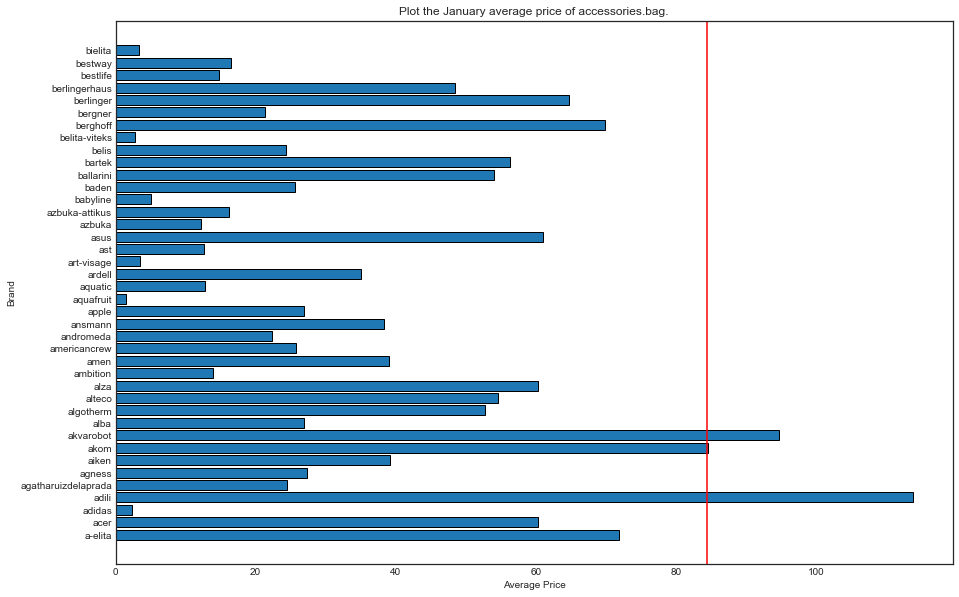

In [12]:
category_code_plot_avg_price('accessories.bag')

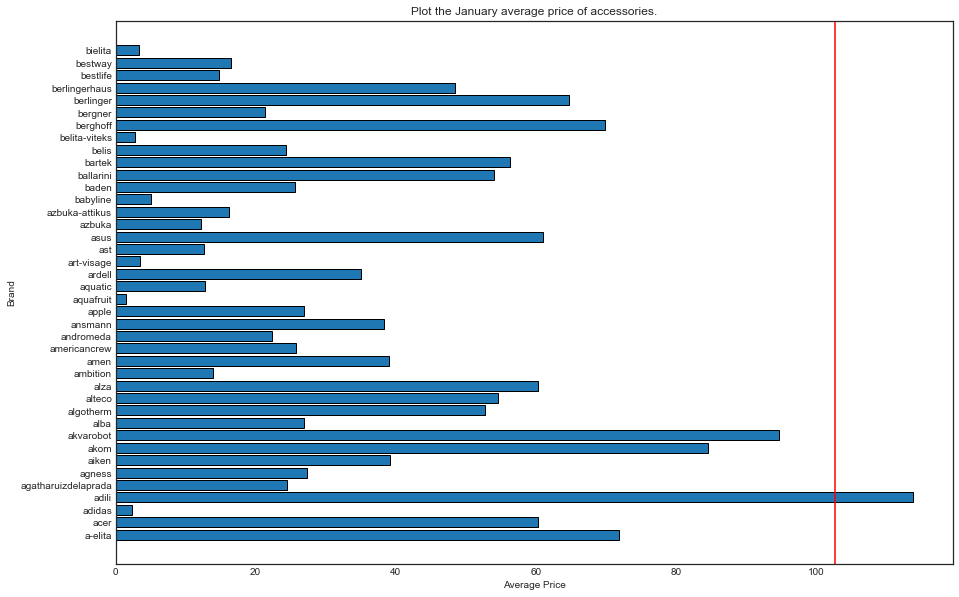

In [13]:
category_plot_avg_price('accessories')

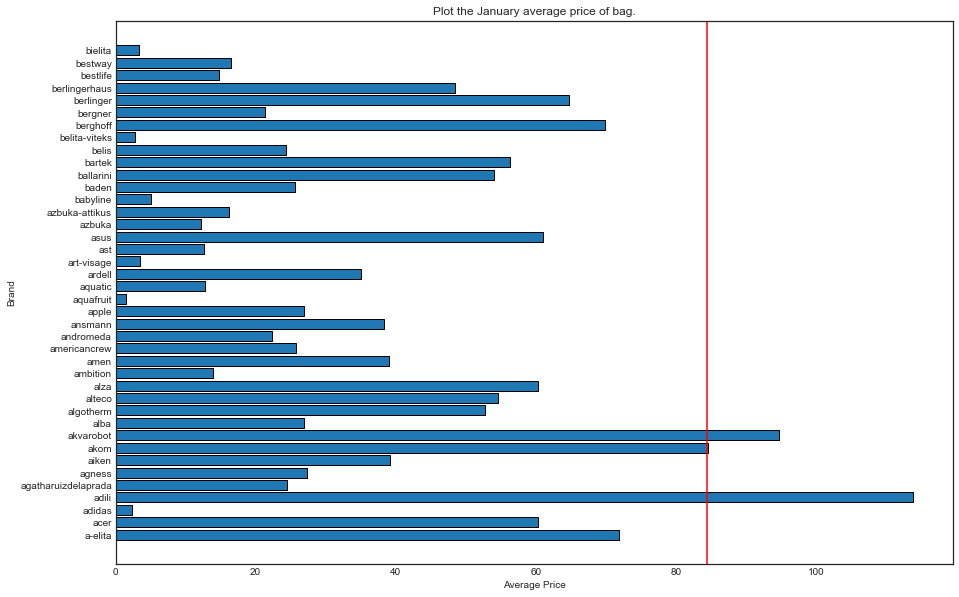

In [14]:
subcategory_plot_avg_price('bag')

 - Find, for each categoty, the brand with the highest average price.

In [15]:
# Find the Category Object with the Maximum Price 
Max_Price = table.groupby(['category'], as_index=False)['average_price'].max()
Max_Price

,category,average_price
0,accessories,1806.154857
1,apparel,2445.370000
2,appliances,2573.810000
3,auto,2280.568638
4,computers,2360.684055
5,construction,2344.980000
6,country_yard,2046.008387
7,electronics,2561.200000
8,furniture,2570.980000
9,kids,2548.330000


In [16]:
# Merge the two dataset
merge_dataset = Max_Price.merge(table, on='average_price')
# Select only conversion rate and sort in decring order
Merge_dataset = merge_dataset.drop(columns=['category_y'])
# rename the column
Merge_dataset = Merge_dataset.rename(columns={"category_x": "category", "average_price":"Max_price"})
Dataset_ascending = Merge_dataset.sort_values(by='Max_price', ascending=False, inplace=False)
Dataset_ascending

,category,Max_price,sub_category,category_code,brand
2,appliances,2573.810000,kitchen.toster,appliances.kitchen.toster,pinarello
8,furniture,2570.980000,kitchen.table,furniture.kitchen.table,florencemode
7,electronics,2561.200000,audio.acoustic,electronics.audio.acoustic,monitoraudio
9,kids,2548.330000,skates,kids.skates,volta
1,apparel,2445.370000,trousers,apparel.trousers,gomeldrev
11,sport,2372.000000,ski,sport.ski,kessler
4,computers,2360.684055,components.power_supply,computers.components.power_supply,buderus
5,construction,2344.980000,tools.screw,construction.tools.screw,yjfitness
3,auto,2280.568638,accessories.winch,auto.accessories.winch,femi
6,country_yard,2046.008387,lawn_mower,country_yard.lawn_mower,shua


QUESTION 5:

            In what part of the day is your store most visited?

In [17]:
# Select part of the dataset
Month = selected_month.iloc[:,0:5]
Month = Month.drop(columns=['product_id','category_id'])
Month.head()

,event_time,event_type,category_code
0,2020-01-01 00:00:00 UTC,view,construction.tools.light
1,2020-01-01 00:00:01 UTC,view,construction.tools.light
2,2020-01-01 00:00:01 UTC,view,apparel.shirt
3,2020-01-01 00:00:01 UTC,view,apparel.shoes
4,2020-01-01 00:00:02 UTC,view,apparel.shoes.step_ins


In [18]:
Month.shape

(55967041, 3)

In [19]:
# Transform the data event_time in datatime
Month.event_time = pd.to_datetime(Month.event_time)

In [20]:
# Hour Visitor
Hour = Month.resample('H', on='event_time').event_type.count()
print(Hour)

event_time
2020-01-01 00:00:00+00:00     8458
2020-01-01 01:00:00+00:00     8381
2020-01-01 02:00:00+00:00    13323
2020-01-01 03:00:00+00:00    24152
2020-01-01 04:00:00+00:00    40788
                             ...  
2020-01-31 19:00:00+00:00    80800
2020-01-31 20:00:00+00:00    50024
2020-01-31 21:00:00+00:00    28138
2020-01-31 22:00:00+00:00    17827
2020-01-31 23:00:00+00:00    12525
Freq: H, Name: event_type, Length: 744, dtype: int64


In [21]:
# Days Visitor
Day = Month.resample('D', on='event_time').event_type.count()
print(Day)

event_time
2020-01-01 00:00:00+00:00    1489444
2020-01-02 00:00:00+00:00    1772949
2020-01-03 00:00:00+00:00    1886319
2020-01-04 00:00:00+00:00    1864932
2020-01-05 00:00:00+00:00    1847346
2020-01-06 00:00:00+00:00    1805710
2020-01-07 00:00:00+00:00    1807824
2020-01-08 00:00:00+00:00    1690019
2020-01-09 00:00:00+00:00    1657283
2020-01-10 00:00:00+00:00    1661507
2020-01-11 00:00:00+00:00    1717892
2020-01-12 00:00:00+00:00    1746324
2020-01-13 00:00:00+00:00    1730151
2020-01-14 00:00:00+00:00    1713466
2020-01-15 00:00:00+00:00    1655113
2020-01-16 00:00:00+00:00    1887475
2020-01-17 00:00:00+00:00    1973832
2020-01-18 00:00:00+00:00    2165950
2020-01-19 00:00:00+00:00    2247148
2020-01-20 00:00:00+00:00    1937638
2020-01-21 00:00:00+00:00    1861225
2020-01-22 00:00:00+00:00    1710474
2020-01-23 00:00:00+00:00    1764536
2020-01-24 00:00:00+00:00    1667054
2020-01-25 00:00:00+00:00    1746912
2020-01-26 00:00:00+00:00    1831671
2020-01-27 00:00:00+00:00  

In [22]:
# Weak Visitor (starting on monday)
Week_Mon = Month.resample('W-MON', on='event_time').event_type.count()
print(Week_Mon)

event_time
2020-01-06 00:00:00+00:00    10666700
2020-01-13 00:00:00+00:00    12011000
2020-01-20 00:00:00+00:00    13580622
2020-01-27 00:00:00+00:00    12236243
2020-02-03 00:00:00+00:00     7472476
Freq: W-MON, Name: event_type, dtype: int64


In [23]:
# group the vistior's view with a range of 3H
Hour_6 = Month.resample('6H', on='event_time').event_type.count()
Hour_6 = pd.DataFrame(Hour_6)
Hour_6

,event_type
event_time,
2020-01-01 00:00:00+00:00,152842
2020-01-01 06:00:00+00:00,498312
2020-01-01 12:00:00+00:00,580199
2020-01-01 18:00:00+00:00,258091
2020-01-02 00:00:00+00:00,223629
...,...
2020-01-30 18:00:00+00:00,266263
2020-01-31 00:00:00+00:00,355765
2020-01-31 06:00:00+00:00,748970


In [24]:
# show in decresing order the view 3H (head)
Hour_6.sort_values(by='event_type', ascending=False, inplace=False).head(15)

,event_type
event_time,
2020-01-19 06:00:00+00:00,857471
2020-01-31 12:00:00+00:00,848071
2020-01-19 12:00:00+00:00,804141
2020-01-18 12:00:00+00:00,795419
2020-01-18 06:00:00+00:00,752665
2020-01-31 06:00:00+00:00,748970
2020-01-20 12:00:00+00:00,745160
2020-01-16 12:00:00+00:00,719634
2020-01-30 12:00:00+00:00,711658


In [25]:
# show in decresing order the view 3H (tail)
Hour_6.sort_values(by='event_type', ascending=False, inplace=False).tail(15)

,event_type
event_time,
2020-01-11 00:00:00+00:00,241697
2020-01-12 00:00:00+00:00,240595
2020-01-08 18:00:00+00:00,239685
2020-01-22 18:00:00+00:00,239600
2020-01-23 18:00:00+00:00,237208
2020-01-14 18:00:00+00:00,233914
2020-01-13 18:00:00+00:00,231911
2020-01-09 18:00:00+00:00,231700
2020-01-29 18:00:00+00:00,231225


In [26]:
# Create the daily view with the average hour view
Hour_df = pd.DataFrame(Hour)
Hour_df.reset_index(inplace=True)
Hours = Hour_df.resample('D', on='event_time').event_type.mean()
# Create a dataframe 
Hours_df = pd.DataFrame(Hours)
Hours_df.reset_index(inplace=True)
# Add the column value
Hours_df= Hours_df.rename(columns={'event_type': 'avg_hour_count'})
# add a columns with only the numbers of days
Hours_df['days'] = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,
               20,21,22,23,24,25,26,27,28,29,30,31]
Hours_df

,event_time,avg_hour_count,days
0,2020-01-01 00:00:00+00:00,62060.166667,1
1,2020-01-02 00:00:00+00:00,73872.875000,2
2,2020-01-03 00:00:00+00:00,78596.625000,3
3,2020-01-04 00:00:00+00:00,77705.500000,4
4,2020-01-05 00:00:00+00:00,76972.750000,5
5,2020-01-06 00:00:00+00:00,75237.916667,6
6,2020-01-07 00:00:00+00:00,75326.000000,7
7,2020-01-08 00:00:00+00:00,70417.458333,8
8,2020-01-09 00:00:00+00:00,69053.458333,9
9,2020-01-10 00:00:00+00:00,69229.458333,10


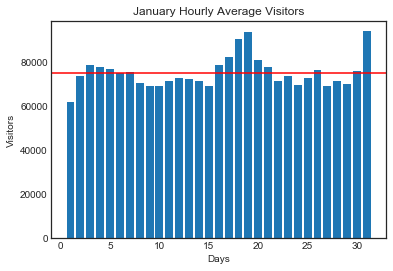

In [27]:
plt.figure()
plt.bar(Hours_df['days'],Hours_df['avg_hour_count'])
plt.axhline(Hours_df['avg_hour_count'].mean(), c='red')
plt.title('January Hourly Average Visitors')
plt.xlabel('Days')
plt.ylabel('Visitors')
plt.show()

QUESTION 6:

            What is the conversion rate of your store?

 - Find the overall conversion rate

In [3]:
# Select part of the dataset
Month = selected_month.iloc[:,1:6]
Month = Month.drop(columns=['brand'])
Month

,event_type,product_id,category_id,category_code
0,view,1005073,2232732093077520756,construction.tools.light
1,view,1005192,2232732093077520756,construction.tools.light
2,view,100063693,2053013552427434207,apparel.shirt
3,view,5100816,2232732103831716449,apparel.shoes
4,view,100014325,2232732103294845523,apparel.shoes.step_ins
...,...,...,...,...
55967036,view,5100833,2232732103831716449,apparel.shoes
55967037,view,1005239,2232732093077520756,construction.tools.light
55967038,view,100043202,2053013556521075159,apparel.shoes
55967039,view,2900565,2232732102103663163,furniture.bedroom.blanket


In [4]:
# Count the number of the event type in the dataset
count = Month['event_type'].value_counts() 
# Transform the result in array
count = np.array(count)
# Find the Overall Conversion Rate
Overall_cr = count[2] / count[0] * 100
Overall_cr

1.5907687415991207

 - Plot the number of purchase per each category and show the conversion rate

In [5]:
#Groupby by the event type and the category code
table = Month.groupby(['category_code','event_type'], as_index=False).count()
# Fix the dataframe
table = table.rename(columns={"product_id": "count"})
table = table.iloc[:,0:3]
table

,category_code,event_type,count
0,accessories.bag,cart,13176
1,accessories.bag,purchase,3269
2,accessories.bag,view,498697
3,accessories.umbrella,cart,981
4,accessories.umbrella,purchase,236
...,...,...,...
400,sport.trainer,purchase,3723
401,sport.trainer,view,744126
402,stationery.cartrige,cart,1198
403,stationery.cartrige,purchase,233


In [6]:
# Selection only purchase value
purchase = table[table['event_type'] == 'purchase']
# Number of purchase in decresing order
purchase_sort = purchase.sort_values(by='count', ascending=False, inplace=False)
purchase_sort

,category_code,event_type,count
256,construction.tools.light,purchase,406058
385,sport.bicycle,purchase,41611
163,appliances.personal.massager,purchase,29227
40,apparel.shoes,purchase,23875
310,electronics.clocks,purchase,23230
...,...,...,...
271,construction.tools.soldering,purchase,12
139,appliances.kitchen.microwave,purchase,11
10,apparel.belt,purchase,9
280,country_yard.furniture.bench,purchase,3


In [7]:
# Selection only view value
view = table[table['event_type'] == 'view']
# Merge Purchase and View Dataset
Merge = purchase.merge(view, on='category_code')
Merge = Merge.rename(columns={"category_x": "count"})
Merge

,category_code,event_type_x,count_x,event_type_y,count_y
0,accessories.bag,purchase,3269,view,498697
1,accessories.umbrella,purchase,236,view,50864
2,accessories.wallet,purchase,2023,view,226144
3,apparel.belt,purchase,9,view,1815
4,apparel.costume,purchase,4117,view,397864
...,...,...,...,...,...
130,sport.ski,purchase,3849,view,352964
131,sport.snowboard,purchase,282,view,57878
132,sport.tennis,purchase,284,view,39720
133,sport.trainer,purchase,3723,view,744126


In [8]:
# Split the "category_code" data in category and sub_category
Merge['category'], Merge['sub_category'] = Merge['category_code'].str.split('.', 1).str
Merge = Merge.drop(columns=['sub_category', 'category_code']) 
Merge

,event_type_x,count_x,event_type_y,count_y,category
0,purchase,3269,view,498697,accessories
1,purchase,236,view,50864,accessories
2,purchase,2023,view,226144,accessories
3,purchase,9,view,1815,apparel
4,purchase,4117,view,397864,apparel
...,...,...,...,...,...
130,purchase,3849,view,352964,sport
131,purchase,282,view,57878,sport
132,purchase,284,view,39720,sport
133,purchase,3723,view,744126,sport


In [9]:
Merge = Merge.groupby(['category','event_type_x','event_type_y'], as_index=False).sum()
Merge

,category,event_type_x,event_type_y,count_x,count_y
0,accessories,purchase,view,5528,775705
1,apparel,purchase,view,65842,7060719
2,appliances,purchase,view,114786,8813119
3,auto,purchase,view,5089,459209
4,computers,purchase,view,22552,2614260
5,construction,purchase,view,420131,15094817
6,country_yard,purchase,view,1156,120218
7,electronics,purchase,view,64015,5705786
8,furniture,purchase,view,24875,2518802
9,kids,purchase,view,11357,1415476


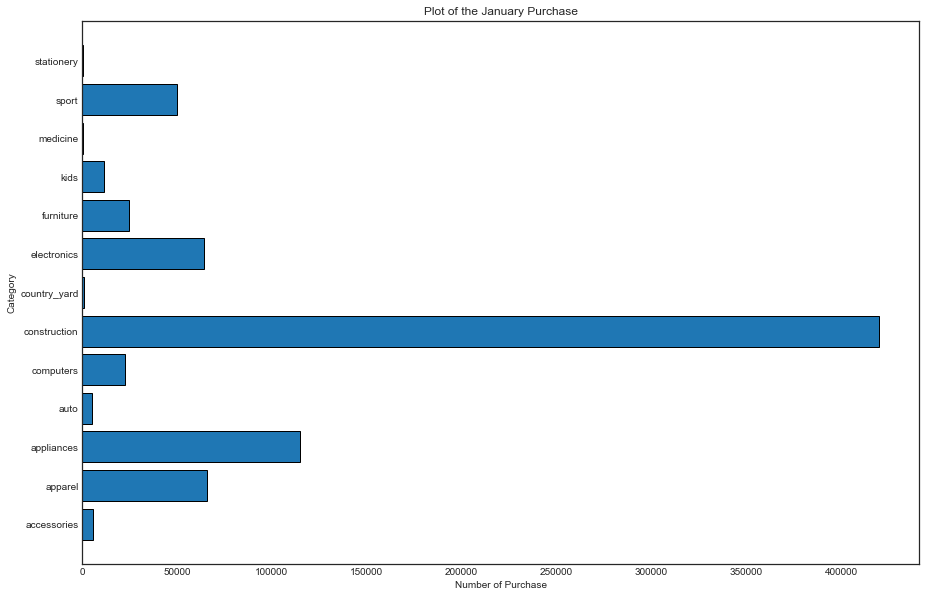

In [10]:
# Make a horizontal bar chart 
plt.figure(figsize = (15, 10))
ax = plt.subplot()
ax.barh(Merge['category'],
        Merge['count_x'], 
            align = 'center', edgecolor = 'k')
plt.xlabel('Number of Purchase')
plt.ylabel('Category')
plt.title('Plot of the January Purchase')
plt.show()

In [11]:
# Add the column 'conversion_rate'
Merge['conversion_rate'] = (Merge['count_x'] / Merge['count_y'])*100
Merge

,category,event_type_x,event_type_y,count_x,count_y,conversion_rate
0,accessories,purchase,view,5528,775705,0.712642
1,apparel,purchase,view,65842,7060719,0.932511
2,appliances,purchase,view,114786,8813119,1.302445
3,auto,purchase,view,5089,459209,1.108210
4,computers,purchase,view,22552,2614260,0.862653
5,construction,purchase,view,420131,15094817,2.783280
6,country_yard,purchase,view,1156,120218,0.961586
7,electronics,purchase,view,64015,5705786,1.121931
8,furniture,purchase,view,24875,2518802,0.987573
9,kids,purchase,view,11357,1415476,0.802345


In [12]:
# Select only conversion rate and sort in decring order
Merge = Merge.drop(columns=['event_type_x','count_x','event_type_y','count_y'])
Merge_dec = Merge.sort_values(by='conversion_rate', ascending=False, inplace=False)
Merge_dec

,category,conversion_rate
5,construction,2.783280
11,sport,1.629048
2,appliances,1.302445
7,electronics,1.121931
3,auto,1.108210
8,furniture,0.987573
6,country_yard,0.961586
1,apparel,0.932511
10,medicine,0.882174
4,computers,0.862653


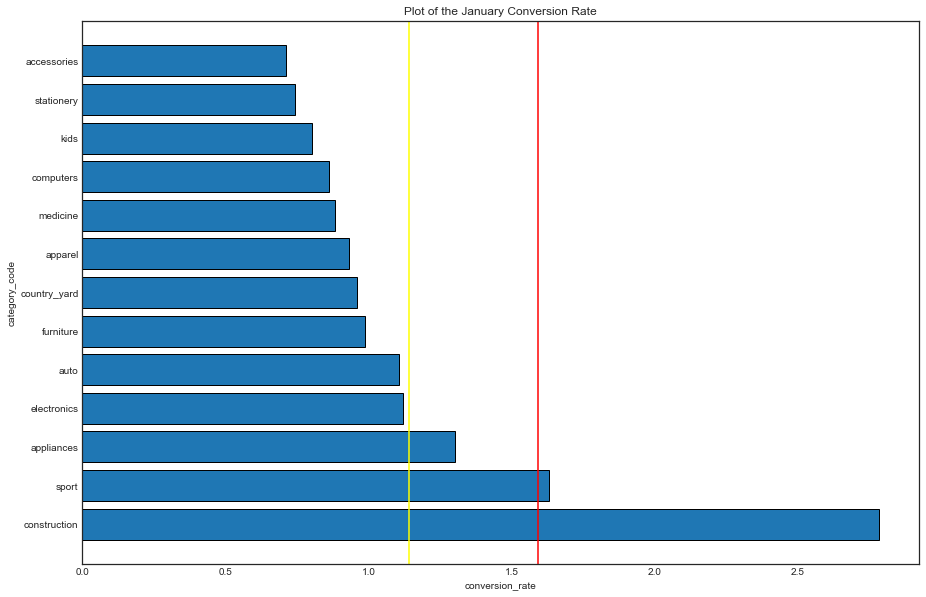

In [13]:
# Make a horizontal bar chart for the conversion rate 
plt.figure(figsize = (15,10))
ax = plt.subplot()
ax.barh(Merge_dec['category'],
        Merge_dec['conversion_rate'], 
            align = 'center', edgecolor = 'k')
plt.axvline(Overall_cr, c='red')
plt.axvline(Merge_dec['conversion_rate'].mean(), c='yellow')
plt.xlabel('conversion_rate')
plt.ylabel('category_code')
plt.title('Plot of the January Conversion Rate')
plt.show()

In [14]:
print(Merge_dec['conversion_rate'])

5     2.783280
11    1.629048
2     1.302445
7     1.121931
3     1.108210
8     0.987573
6     0.961586
1     0.932511
10    0.882174
4     0.862653
9     0.802345
12    0.744528
0     0.712642
Name: conversion_rate, dtype: float64
